In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
path_dev = "./data/development.csv"
path_eva = "./data/evaluation.csv"

df = pd.read_csv(path_dev)
df.head(5)

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      25340 non-null  float64
 11  num_videos                    25384 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

Max value of number of shares  843300
Min value of number of shares  4
Median 3407.0688633138893


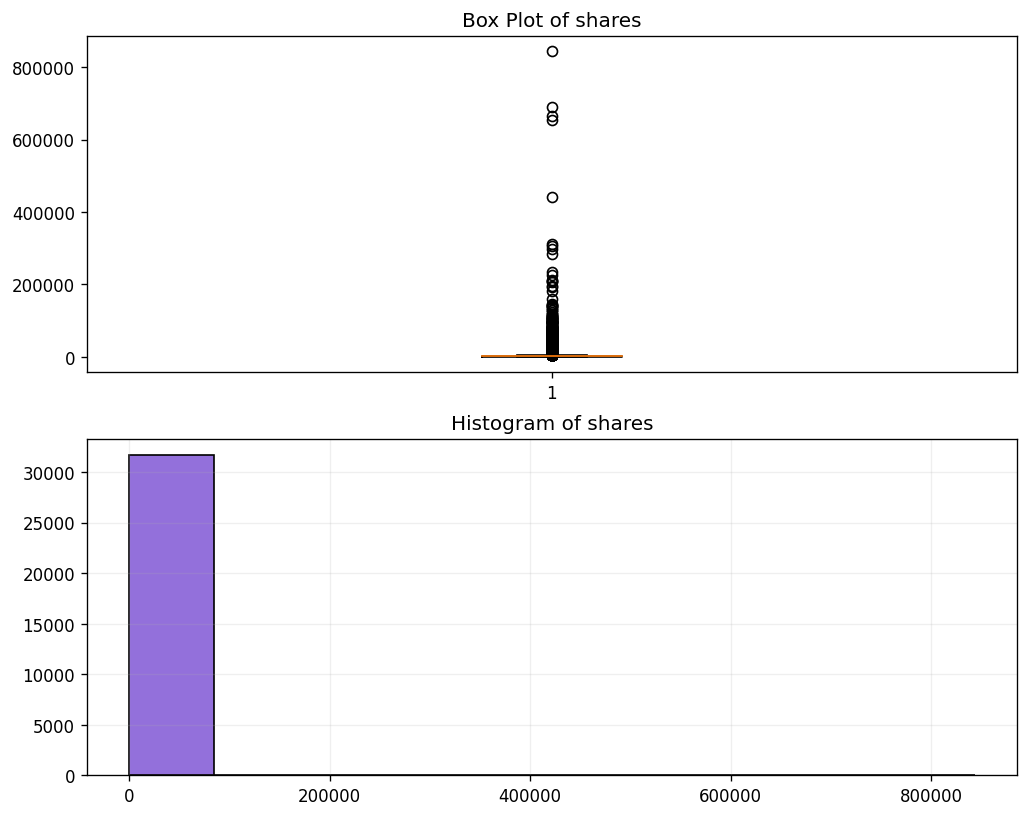

In [31]:
# Showing distribution of the label : # of shares,

fig, ax = plt.subplots(2,1,dpi = 120, figsize = (10,8))

data = df["shares"]
print('Max value of number of shares ', max(data))
print('Min value of number of shares ', min(data))
print('Mean', data.mean())

plt.grid(alpha = 0.2)
ax[0].boxplot(data)
ax[1].hist(data, bins= 10, edgecolor='black', color = 'mediumpurple')

# Set Titles
ax[0].set_title("Box Plot of shares")
ax[1].set_title("Histogram of shares")


# Displaying the plot
plt.show()

In [36]:
quantiles = df['shares'].quantile([0.25, 0.5, 0.75])

print("First quantile " ,quantiles[0.25])
print("Median quantile " ,quantiles[0.5])
print("Third quantile " ,quantiles[0.75])

Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
IQR_inferior = Q1 - 1.5 * (Q3 - Q1)
IQR_superior = Q3 + 1.5 * (Q3 - Q1)


print("IQR Inferior:", IQR_inferior)
print("IQR Superior:", IQR_superior)
print("")
print('Very popular : >=', IQR_superior )
print('Popular: >= ', quantiles[0.75] )
print('Normal: >= ', quantiles[0.25])
print('Not popular <=', quantiles[0.25] )

First quantile  946.0
Median quantile  1400.0
Third quantile  2800.0
IQR Inferior: -1835.0
IQR Superior: 5581.0

Very popular : >= 5581.0
Popular: >=  2800.0
Normal: >=  946.0
Not popular <= 946.0


In [42]:
n_vp = len(df[df["shares"] >= IQR_superior])
n_p = len(df[df["shares"] >= quantiles[0.75] ])
n_n = len(df[df["shares"] >= quantiles[0.25] ])
n_u = len(df[df["shares"] < quantiles[0.25] ])
print("Number of very popular news: ",n_vp )
print("Number of popular news: ", n_p - n_vp)
print("Number of normal news: ", n_n - n_p)
print("Number of unpopular news: ", n_u)



Number of very popular news:  3634
Number of popular news:  4353
Number of normal news:  15819
Number of unpopular news:  7909
31715


Max value of timedelta  731.0
Min value of timedelta  8.0


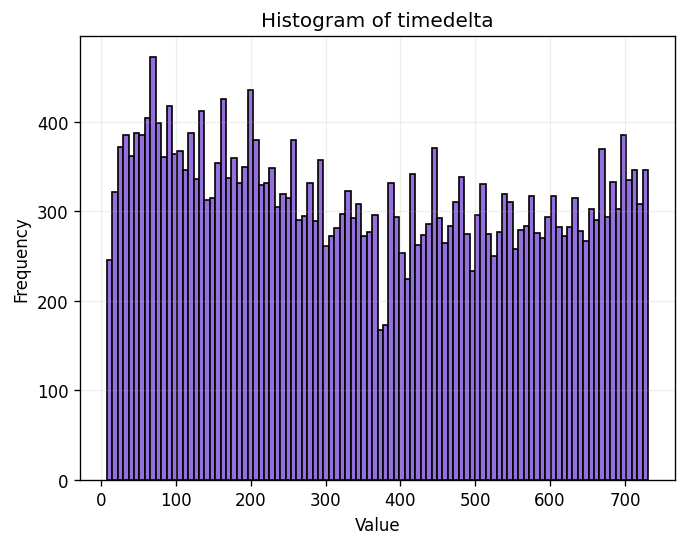

In [17]:
# Showing distribution of the feature : timedelta,
# i.e., days after the publication of the news

fig, ax = plt.subplots(1,1, dpi = 120)

data = df["timedelta"]
print('Max value of timedelta ', max(data))
print('Min value of timedelta ', min(data))
plt.grid(alpha = 0.2)
plt.hist(data, bins= 100, edgecolor='black', color = 'mediumpurple')


# Customizing the plot
plt.title("Histogram of timedelta")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Displaying the plot

plt.show()

In [57]:
filtered_df = df.select_dtypes(exclude=['object', 'bool'])


# Calculate correlation matrix for selected features

correlation_matrix = filtered_df.corr()

top_10_features = correlation_matrix['shares'].abs().nlargest(11).index.tolist()[1:]
top_10_values = correlation_matrix['shares'].abs().nlargest(11)[1:]

print(top_10_features)
print(top_10_values)

['kw_avg_avg', 'LDA_03', 'self_reference_avg_sharess', 'self_reference_min_shares', 'LDA_02', 'kw_max_avg', 'self_reference_max_shares', 'num_imgs', 'num_hrefs', 'kw_avg_max']
kw_avg_avg                    0.103006
LDA_03                        0.080471
self_reference_avg_sharess    0.062653
self_reference_min_shares     0.061501
LDA_02                        0.058666
kw_max_avg                    0.056123
self_reference_max_shares     0.051441
num_imgs                      0.046433
num_hrefs                     0.046224
kw_avg_max                    0.045563
Name: shares, dtype: float64


In [58]:
# Features normalized
for col in filtered_df.columns:
    max_v = max(filtered_df[col])
    min_v = min(filtered_df[col])

    if max_v <= 1 and min_v >= 0:
        print(col)
        

n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
title_subjectivity
abs_title_subjectivity
abs_title_sentiment_polarity


In [59]:
unique_columns = df.columns[df.nunique() == 1]
print(unique_columns)

Index([], dtype='object')


In [60]:
correlation_matrix = filtered_df.corr(method='kendall')
top_10_features = correlation_matrix['shares'].abs().nlargest(11).index.tolist()[1:]
top_10_values = correlation_matrix['shares'].abs().nlargest(11)[1:]

print(top_10_features)
print(top_10_values)

['kw_avg_avg', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'LDA_02', 'kw_min_avg', 'global_subjectivity', 'num_imgs', 'kw_avg_min']
kw_avg_avg                    0.177827
kw_max_avg                    0.156037
self_reference_avg_sharess    0.135023
self_reference_min_shares     0.126630
self_reference_max_shares     0.118688
LDA_02                        0.104588
kw_min_avg                    0.076717
global_subjectivity           0.076332
num_imgs                      0.064558
kw_avg_min                    0.062927
Name: shares, dtype: float64


In [55]:
correlation_matrix = filtered_df.corr(method='spearman')
top_10_features = correlation_matrix['shares'].abs().nlargest(11).index.tolist()[1:]
top_10_values = correlation_matrix['shares'].abs().nlargest(11)[1:]

print(top_10_features)
print(top_10_values)

['kw_avg_avg', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'LDA_02', 'global_subjectivity', 'kw_min_avg', 'kw_avg_min', 'kw_max_min']


kw_avg_avg                    0.259361
kw_max_avg                    0.227842
self_reference_avg_sharess    0.193903
self_reference_min_shares     0.181423
self_reference_max_shares     0.170796
LDA_02                        0.155207
global_subjectivity           0.112726
kw_min_avg                    0.104967
kw_avg_min                    0.093259
kw_max_min                    0.092380
Name: shares, dtype: float64

In [62]:
string_df = df.select_dtypes(include=['object', 'bool'])
print(string_df)


                                                     url data_channel  \
0      http://mashable.com/2014/09/08/safest-cabbies-...          bus   
1       http://mashable.com/2013/07/25/3d-printed-rifle/         tech   
2      http://mashable.com/2013/10/30/digital-dinosau...    lifestyle   
3      http://mashable.com/2014/08/27/homer-simpson-i...          bus   
4      http://mashable.com/2013/01/10/creepy-robotic-...         tech   
...                                                  ...          ...   
31710  http://mashable.com/2014/11/30/star-wars-guard...        world   
31711          http://mashable.com/2014/11/14/uk-floods/    lifestyle   
31712  http://mashable.com/2014/09/08/paypal-bitcoin-...         tech   
31713  http://mashable.com/2013/08/23/mashable-androi...    lifestyle   
31714  http://mashable.com/2014/09/24/designers-dilem...       socmed   

         weekday  
0        tuesday  
1       thursday  
2      wednesday  
3      wednesday  
4       thursday  
...      

In [66]:
df_encoded = pd.get_dummies(df, columns=['data_channel', 'weekday'])


   id                                                url  timedelta  \
0   0  http://mashable.com/2014/09/08/safest-cabbies-...      121.0   
1   1   http://mashable.com/2013/07/25/3d-printed-rifle/      532.0   
2   2  http://mashable.com/2013/10/30/digital-dinosau...      435.0   
3   3  http://mashable.com/2014/08/27/homer-simpson-i...      134.0   
4   4  http://mashable.com/2013/01/10/creepy-robotic-...      728.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0            1015.0         0.422018               1.0   
1             9.0             503.0         0.569697               1.0   
2             9.0             232.0         0.646018               1.0   
3            12.0             171.0         0.722892               1.0   
4            11.0             286.0         0.652632               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  ...  \
0                  0.545031       10.0             6.0  ...   
1 

In [67]:
filtered_df = df_encoded.select_dtypes(exclude=['object'])


# Calculate correlation matrix for selected features

correlation_matrix = filtered_df.corr()

top_10_features = correlation_matrix['shares'].abs().nlargest(11).index.tolist()[1:]
top_10_values = correlation_matrix['shares'].abs().nlargest(11)[1:]

print(top_10_features)
print(top_10_values)

['kw_avg_avg', 'data_channel_lifestyle', 'LDA_03', 'self_reference_avg_sharess', 'self_reference_min_shares', 'LDA_02', 'kw_max_avg', 'self_reference_max_shares', 'data_channel_world', 'num_imgs']
kw_avg_avg                    0.103006
data_channel_lifestyle        0.084398
LDA_03                        0.080471
self_reference_avg_sharess    0.062653
self_reference_min_shares     0.061501
LDA_02                        0.058666
kw_max_avg                    0.056123
self_reference_max_shares     0.051441
data_channel_world            0.047170
num_imgs                      0.046433
Name: shares, dtype: float64
